In [30]:
import scipy
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
def geometric_mean(x, y):
    return ((x*y)/(x+y))

def objective_function(x):
    return np.sin(x) * x - np.cos(2 * x / 3 - 1) * x - np.exp(np.absolute(x / 10))

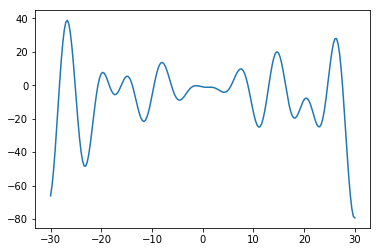

In [58]:
space = np.linspace(-30, 30, num = 200)
plt.plot(space, objective_function(space))
plt.show()

In [59]:
def mutation_1(population, epsilon):
    best = selection_1(population, 10, objective_function)

    for i in best:
        for j in best:
            population = np.append(population, geometric_mean(i + np.random.normal(0, epsilon),
                                                               j + np.random.normal(0, epsilon)))
    return population

In [60]:
def selection_1(population, num, metric):

    new = np.argsort(objective_function(population))
    result = population[new][::-1]
    result = result[result < 100]
    result = result[result > -100]

    return result[:num], result[0], result[-1]

In [70]:
population = np.linspace(-20, 20, num = 20)

worst = np.zeros(100)
best = np.zeros(100)
means = np.zeros(100)

for i in range(100):

    population, best[i], worst[i] = selection_1(population, 20, metric = objective_function)
    means[i] = np.mean(function(population))
    population = mutation_1(population, epsilon = 1.5)
    

print (objective_function(selection_1(population, 1, objective_function)[0]),
       selection_1(population, 1, objective_function)[0])

[ 36.3105937] [-27.10862755]


/home/antonio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


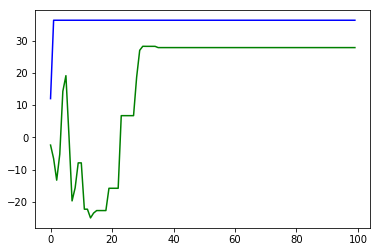

In [71]:
plt.plot(range(100), objective_function(best), '-b', range(100),
         objective_function(means), '-g')
plt.show()

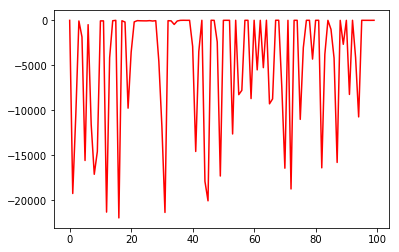

In [72]:
plt.plot(range(100), objective_function(worst), "-r")
plt.show()

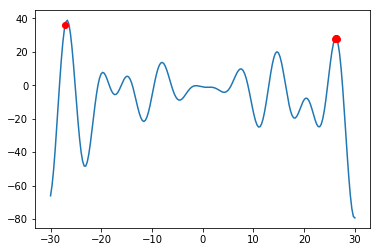

In [76]:
space = np.linspace(-30, 30, num = 200)
winners =  selection_1(population, 5, objective_function)[0]
plt.plot(space, objective_function(space), '-',
         winners, objective_function(winners), 'ro')
plt.show()